In [1]:
import sys,os
add_path = os.path.abspath('../python')
if not add_path in sys.path:
    sys.path.append(add_path)
print(sys.path.index(add_path))

15


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
from numpy import vstack, hstack
from segbench import edgeNms2d,correspondPixels
from scipy import signal,misc
import scipy.ndimage as ndi
from scipy.ndimage import filters as filt
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
def edgeOrientation(E,r=5):
    if(r<=1):
        p=12/r/(r+2)-2;f=np.array([1,p,1])/(2+p); r=1;
    else:
        f = np.array(hstack((range(1,r),r+1,range(r,1,-1))),dtype=float)/(r+1)**2
    F = np.zeros((len(f),len(f)))
    F[:,len(f)/2] = f
    F = signal.convolve2d(F,F.T,mode='full')
    En = signal.convolve2d(E,F,mode='same')
    Ox,Oy = np.gradient(En)
    Oxx,_ = np.gradient(Ox);
    Oxy,Oyy = np.gradient(Oy);
    return np.arctan(Oyy*np.sign(-Oxy)/(Oxx+1e-5))
def normalimg(E):
    return (E-E.min())/(E.max()-E.min())

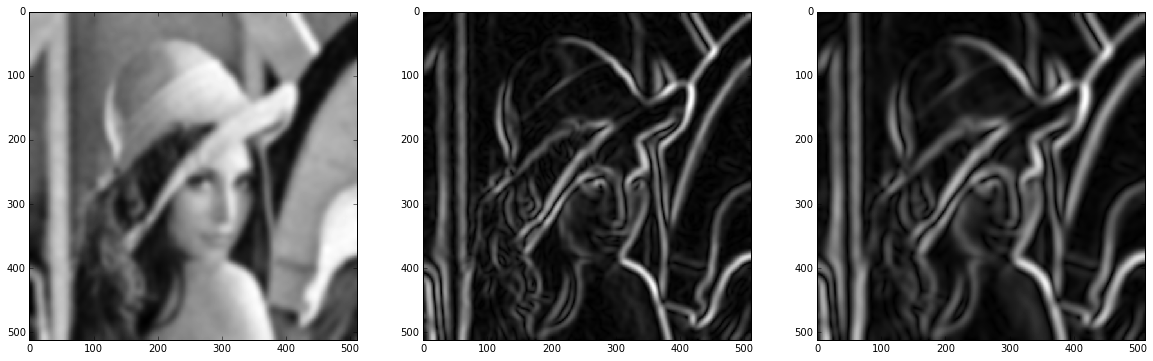

In [4]:
I = misc.lena().astype(float)
noise = np.random.rand(*I.shape)*100
I = I+noise
I = filt.gaussian_filter(I,5)
sx,sy = ndi.sobel(I, axis=0, mode='mirror'),ndi.sobel(I, axis=1, mode='mirror')
E = normalimg(np.hypot(sx, sy))
O = edgeOrientation(E,5)
E1 = normalimg(ndi.gaussian_gradient_magnitude(I,5))
O1 = edgeOrientation(E1,5)
plt.subplot(1,3,1)
plt.imshow(I)
plt.subplot(1,3,2)
plt.imshow(E)
plt.subplot(1,3,3)
plt.imshow(E1)
plt.show()

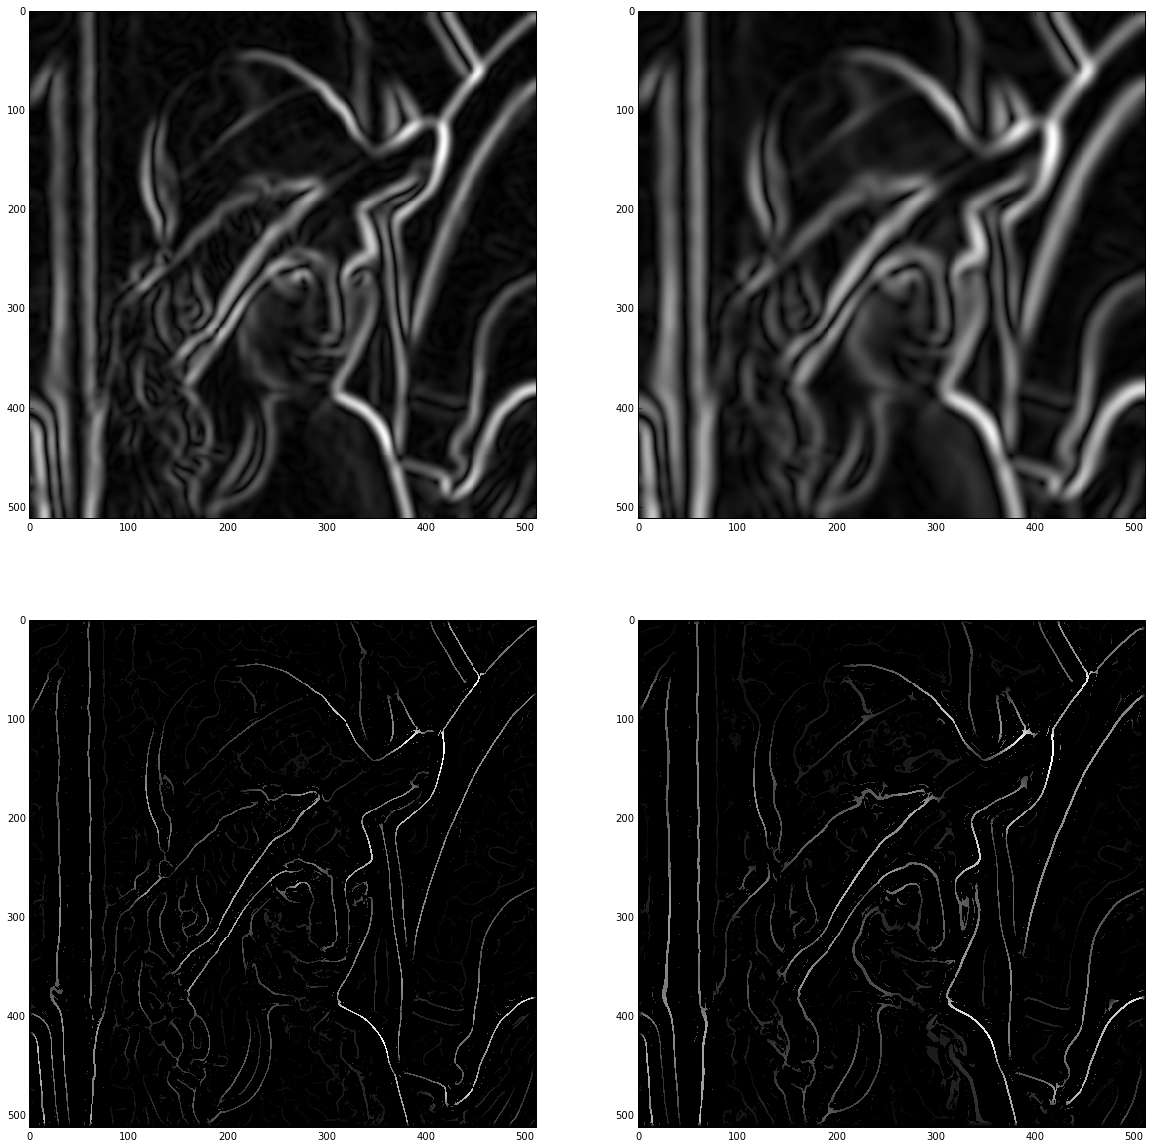

In [5]:
Enms = edgeNms2d(E.astype(np.float32),
          O.astype(np.float32),
          r=1,s=5,m=1.01)
Enms1 = edgeNms2d(E1.astype(np.float32),
          O1.astype(np.float32),
          r=1,s=5,m=1.01)

plt.subplot(2,2,1)
plt.imshow(E)
plt.subplot(2,2,2)
plt.imshow(E1)
plt.subplot(2,2,3)
plt.imshow(Enms)
plt.subplot(2,2,4)
plt.imshow(Enms1)

In [6]:
cost,oc,match1,match2 = correspondPixels(Enms.astype(np.float32),Enms1.astype(np.float32),.005)
print "cost:",cost,"oc:",oc

NotImplementedError: Wrong number or type of arguments for overloaded function '_correspondPixels'.
  Possible C/C++ prototypes are:
    correspondPixels(double const *,int const,int const,double const *,int const,int const,double *,int,int,double *,int,int,double &,double &,double)
    correspondPixels(double const *,int const,int const,double const *,int const,int const,double *,int,int,double *,int,int,double &,double &)


In [ ]:
plt.subplot(1,2,1)
plt.imshow(match1)
plt.subplot(1,2,2)
plt.imshow(match2)

In [9]:
# if you want to compare to matlab
from scipy.io import savemat
mat= dict(E=E,E1=E1,Enms=Enms,Enms1=Enms1)
savemat('../../nms-python.mat',mat)